<a href="https://colab.research.google.com/github/mldmort/Mortazavi2021_B6B10/blob/main/Colab_Notebooks/dendrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To run this script

---
Upload files `snp_str_sv_matrix.mibs` and `snp_str_sv_plink_out.fam` into the content folder of this page. 

To generate these files run:

`bash cmd_prepare_files.sh` 

in the folder `dendrogram` [here.](https://github.com/mldmort/Mortazavi2021_B6B10) 

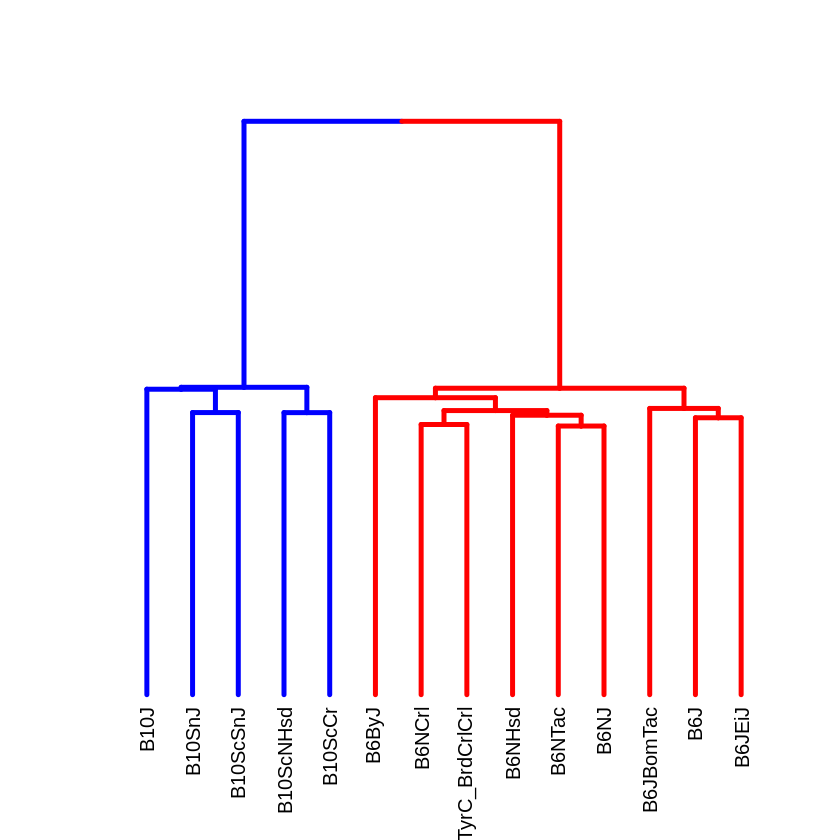

In [3]:
install.packages('dendextend')

###===================== plot dendrogram ====================
vars <- read.table("snp_str_sv_matrix.mibs",header=F,stringsAsFactors=F)
fam <- read.table("snp_str_sv_plink_out.fam",header=F,stringsAsFactors=F)

strains = data.frame(s_code=c('R134', 'R72', 'R2', 'R144', 'R84', 'R114', 'R124', 'R52', 'R104', 'R94', 'R22', 'R32', 'R42', 'R62'), s_name=c('B6N-TyrC_BrdCrlCrl', 'B6ByJ', 'B6J', 'B6JBomTac', 'B6JEiJ', 'B6NCrl', 'B6NHsd', 'B6NJ', 'B6NTac', 'B10ScNHsd', 'B10ScSnJ', 'B10SnJ', 'B10ScCr', 'B10J'))
rownames(strains)=strains$s_code
rownames(vars) = strains[fam[,2],'s_name']

order = c('B10SnJ', 'B10J', 'B10ScNHsd', 'B10ScCr', 'B10ScSnJ', 'B6ByJ', 'B6NCrl', 'B6NHsd', 'B6NTac', 'B6N-TyrC_BrdCrlCrl', 'B6NJ', 'B6JBomTac', 'B6J', 'B6JEiJ')

hc = hclust(dist(vars))
hcd = as.dendrogram(hc)

library('dendextend')

#pdf("vars_dendrogram.pdf", width=7.5, height=5)
hcd1=color_branches(hcd,k=2, col = c('red','blue')) 
hcd1<-set(hcd1, 'branches_lwd', 4)
hcd1<-set(hcd1, 'labels_cex', 1)
hcd1<-rotate(hcd1, order)
hcd1<-raise.dendrogram(hcd1, 0.5)
plot(hcd1, main=NULL, ann=FALSE, axes=FALSE)
#dev.off()